<a href="https://colab.research.google.com/github/manjitullal/Machine-Learning-from-scratch-code/blob/master/XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGboost

In [1]:
!pip3 install xgboost
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=690aee61499be2058fa776be5d710c24ad420d3fb513cfa59e3ef17f17a047b5
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import svm, metrics
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

In [5]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # convert 1797x8x8 to 1797x64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [7]:
classifier_svm = svm.SVC(gamma=0.001)
classifier_svm.fit(X_train, y_train)
predicted_svm = classifier_svm.predict(X_test)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

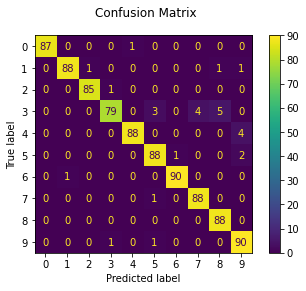

In [8]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_svm, metrics.classification_report(y_test, predicted_svm)))
disp = metrics.plot_confusion_matrix(classifier_svm, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [9]:
classifier_xg = xgb.XGBClassifier() 
classifier_xg.fit(X_train, y_train) 
predicted_xg = classifier_xg.predict(X_test) 

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.86      0.82      0.84        91
           2       0.96      0.90      0.93        86
           3       0.86      0.82      0.84        91
           4       0.96      0.87      0.91        92
           5       0.89      0.91      0.90        91
           6       0.93      0.95      0.94        91
           7       0.98      0.93      0.95        89
      

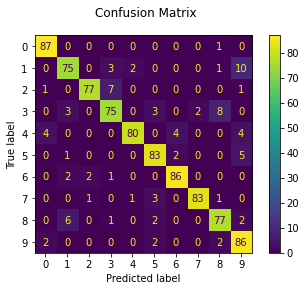

In [10]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_xg, metrics.classification_report(y_test, predicted_xg)))
disp = metrics.plot_confusion_matrix(classifier_xg, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [12]:
# gradient boosting with scaling 
# scaling makes not different here 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler to training data only
scaler_fit = scaler.fit(X_train)
X_trains = scaler_fit.transform(X_train)
X_tests = scaler_fit.transform(X_test)

In [13]:
classifier_xgs = xgb.XGBClassifier() 
classifier_xgs.fit(X_trains, y_train) 
predicted_xgs = classifier_xgs.predict(X_tests) 

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.86      0.82      0.84        91
           2       0.96      0.90      0.93        86
           3       0.86      0.82      0.84        91
           4       0.96      0.87      0.91        92
           5       0.89      0.91      0.90        91
           6       0.93      0.95      0.94        91
           7       0.98      0.93      0.95        89
      

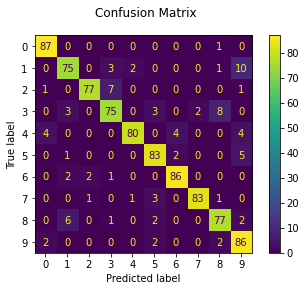

In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_xgs, metrics.classification_report(y_test, predicted_xgs)))
disp = metrics.plot_confusion_matrix(classifier_xgs, X_tests, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

without hyper-parameter tuning we can see xgboost is not doing better than the svm

## Bayesian Optimization to  improve the parameters 

https://www.youtube.com/watch?v=vz3D36VXefI

https://analyticsindiamag.com/implementing-bayesian-optimization-on-xgboost-a-beginners-guide/

https://cloud.google.com/ai-platform/training/docs/hyperparameter-tuning-overview

https://analyticsindiamag.com/implementing-bayesian-optimization-on-xgboost-a-beginners-guide/


In [19]:
train = xgb.DMatrix(X_train, label=y_train)

In [22]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [23]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120)
                                            })

In [24]:
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -1.34     |  0.7667   |  0.4502   |  8.172    |  108.8    |
|  2        | -1.904    |  0.6684   |  0.9679   |  5.617    |  112.7    |
|  3        | -1.637    |  0.2586   |  0.7842   |  8.039    |  115.7    |
|  4        | -1.65     |  0.8981   |  0.7786   |  9.71     |  106.6    |
|  5        | -1.215    |  0.9487   |  0.1893   |  3.908    |  101.3    |
|  6        | -1.125    |  0.06803  |  0.1387   |  5.522    |  103.2    |
|  7        | -1.396    |  0.4239   |  0.4647   |  8.302    |  109.7    |
|  8        | -1.369    |  0.734    |  0.5389   |  9.316    |  101.1    |
|  9        | -4.889    |  0.0      |  0.0      |  3.0      |  105.7    |
|  10       | -1.183    |  0.4218   |  0.2228   |  5.924    |  101.9    |
|  11       | -1.158    |  0.0      |  0.1135   |  7.287    |  103.3    |
|  12       | -1.836    |  1.0      | 

In [25]:
params = xgb_bo.max['params']
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

print(params)

{'gamma': 0.06802551138810298, 'learning_rate': 0.13865270671264407, 'max_depth': 5, 'n_estimators': 103}


In [26]:
from xgboost import XGBClassifier

classifier_xgbho = xgb.XGBClassifier(**params)
classifier_xgbho = classifier_xgbho.fit(X_train, y_train)
predicted_xgbho = classifier_xgbho.predict(X_test)

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.06802551138810298,
              learning_rate=0.13865270671264407, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=103, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.85      0.82      0.84        91
           2       0.94      0.90      0.92        86
           3       0.90      0.81      0.86        91
           4       0.98      0.86      0.91        92
           5       0.85      0.91      0.88        91
           6       0.93      0.90      0.92        91
           7       0.93   

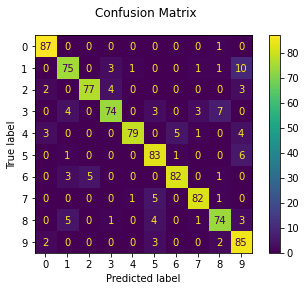

In [27]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_xgbho, metrics.classification_report(y_test, predicted_xgbho)))
disp = metrics.plot_confusion_matrix(classifier_xgbho, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)